In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

In [4]:
print("hello world")

hello world


In [5]:
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

In [6]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [7]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [8]:
X = mnist['data']
y = mnist['target']

In [11]:
X[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [12]:
y[0]

'5'

In [13]:
X.shape, y.shape

((70000, 784), (70000,))

In [14]:
# Tittar på ett exempel av datan

In [15]:
X_reshaped_28_28 = X.reshape(70000, 28, 28)

In [16]:
X_reshaped_28_28.shape

(70000, 28, 28)

In [17]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

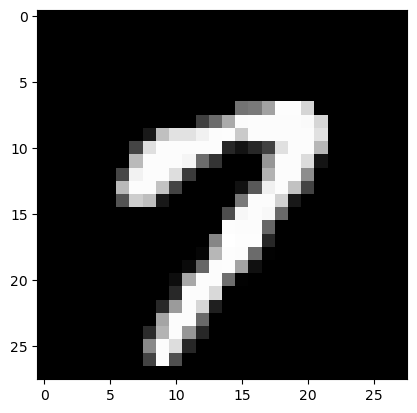

In [18]:
plt.imshow(X_reshaped_28_28[15], cmap='gray')

In [19]:
# Vi ser att det är en 5a, vilket stämde för target 0 var också 5.

In [20]:
def train_val_test_split(X_data, y_data, train_ratio, val_ratio, test_ratio):
    if(train_ratio + val_ratio + test_ratio != 1):
        raise ValueError("Ratios must add up to 1")
    X_train_val, X_test, y_train_val, y_test = train_test_split(X_data, y_data, test_size=test_ratio)
    new_val_ratio = val_ratio / (val_ratio + train_ratio)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=val_ratio)
    #print(X_train.size, X_val.size, X_test.size, y_train.size, y_val.size, y_test.size)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [35]:
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(X, y, 0.75, 0.15, 0.1)

In [37]:
print(X_train.size/X.size, X_val.size/X.size, X_test.size/X.size)

0.765 0.135 0.1


In [39]:
# Kommer använda train-data för att träna två modeller. 

In [41]:
# Model 1: Logistic Regression classification with GridSearchCV

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [45]:
print("MODEL1")

MODEL1


In [47]:
scaler = StandardScaler()

In [49]:
scaler.fit(X_train)

StandardScaler()

In [51]:
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [28]:
log_param_grid_cv = {
    'C':[1.0, 5.0, 10],
    'penalty':['None', 'l2'],
    'solver':['lbfgs', 'newton-cg']
}

In [29]:
log_clf = LogisticRegression(random_state=42, verbose=2, n_jobs=-1, max_iter=500)

In [30]:
cv_log = GridSearchCV(log_clf, log_param_grid_cv)

In [31]:
cv_log.fit(X_train_scaled, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.

KeyboardInterrupt



In [ ]:
cv_log.best_params_

In [32]:
logistic_best_model = cv_log.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [ ]:
y_val_pred = logistic_best_model.predict(X_val_scaled)

In [69]:
from sklearn.metrics import accuracy_score

In [36]:
print(accuracy_score(y_val, y_val_pred))

NameError: name 'y_val_pred' is not defined

In [ ]:
# Vi har alltså 83% med vår modell med logistisk regressions klassficering.

In [ ]:
# Nu testar vi support vector machine

In [53]:
from sklearn.svm import SVC

In [55]:
svm_clf = SVC(random_state=42, verbose=2)

In [57]:
svc_param_grid_cv = {
    'C': [2.0, 5.0],
    'kernel': ['rbf'],
    'gamma': [1e-3, 1e-4, 1e-5]
}

In [59]:
svc_cv = GridSearchCV(estimator=svm_clf, param_grid=svc_param_grid_cv, n_jobs=-1)

In [61]:
svc_cv.fit(X_train_scaled, y_train)

[LibSVM]

GridSearchCV(estimator=SVC(random_state=42, verbose=2), n_jobs=-1,
             param_grid={'C': [2.0, 5.0], 'gamma': [0.001, 0.0001, 1e-05],
                         'kernel': ['rbf']})

In [63]:
y_pred_val_svc = svc_cv.predict(X_val_scaled)

In [71]:
print(accuracy_score(y_val, y_pred_val_svc))

0.9686772486772487


In [73]:
# Vi får 96% noggranhet med SVC modellen.
# Alltså ser vi att den bästa modellen är definivt support vector classification gentemot logistic på mnist datat.
# Vi undersöker hur det ser ut för testdatat.

In [75]:
y_pred_test_svc = svc_cv.predict(X_test_scaled)

In [79]:
print(accuracy_score(y_test, y_pred_test_svc))

0.9694285714285714


In [81]:
# Samma som validation vilket är fullt rimligt eftersom modellen varken sett validation data eller test data.
# I detta fall hade det varit rimligt att endast köra på tränings och testdata och inte ha validering eftersom vi inte
# använder den för att justera hyperparametrar.
